#       2021-Jan-26 (Tue) – Dataset Exploring and Environment setup

### Import pandas library and find out info about data frame from "train.csv"

In [1]:
import pandas

df = pandas.read_csv("train.csv")
print("size: ", df.size, "\n")
print("shape: ", df.shape, "\n")
print("columns: ", list(df.columns), "\n")
print("type of each column:\n", df.dtypes)


size:  128856 

shape:  (10738, 12) 

columns:  ['customer_id', 'customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score', 'customer_active_segment', 'X1', 'customer_category'] 

type of each column:
 customer_id                          object
customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object


### Print out our data frame

In [2]:
df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,23.672615,6.701514,0.092879,-0.017332,1.210397,7.003663,3.027084,1.952911,C,BA,0
10734,csid_10735,25.673028,6.497796,0.050216,-0.047211,0.725230,5.407507,3.104172,5.124286,C,BA,0
10735,csid_10736,31.676844,7.799880,0.062961,-0.032765,0.318118,5.598486,2.403051,21.864188,A,BA,0
10736,csid_10737,28.441780,5.588302,-0.093931,0.081586,0.132177,3.616492,4.972243,86.969977,B,AA,0


# 2021-Jan-27-28 (Wed-Thu) – Data Visualization

#### Remove all NaNs by changing them for random data from each column

In [3]:
import numpy as np

for col in df.columns: 
    df[col] = df[col].fillna(np.random.choice(df[col].unique())) 
    


### Import matplotlib and for every categorical variable build a barplot 

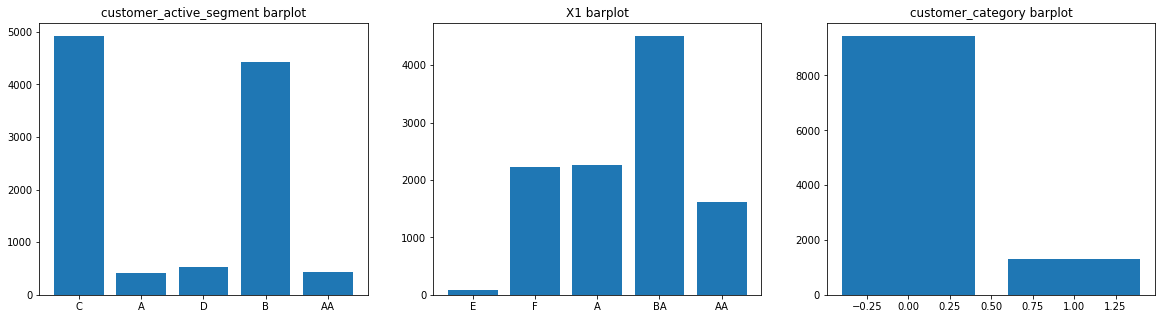

In [4]:
import matplotlib.pyplot as plt

columns = df.columns[-3::]

fig, axs = plt.subplots(1, 3, figsize=(20,  5))

for i in range(3):
    value_dict = dict(df[columns[i]].value_counts(sort=False))
    axs[i].set_title(f"{columns[i]} barplot")
    axs[i].bar(value_dict.keys(), value_dict.values())



plt.show()

In [5]:
# df[df.isnull().values == True]

### For every numerical value build boxplot

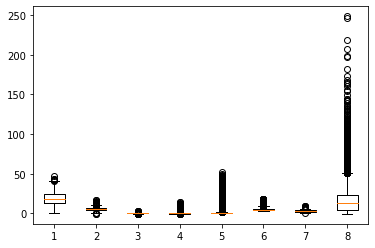

In [6]:
col_names = list(df.columns[1:-3])

plt.boxplot(df[col_names])

plt.show()

### Plot histograms

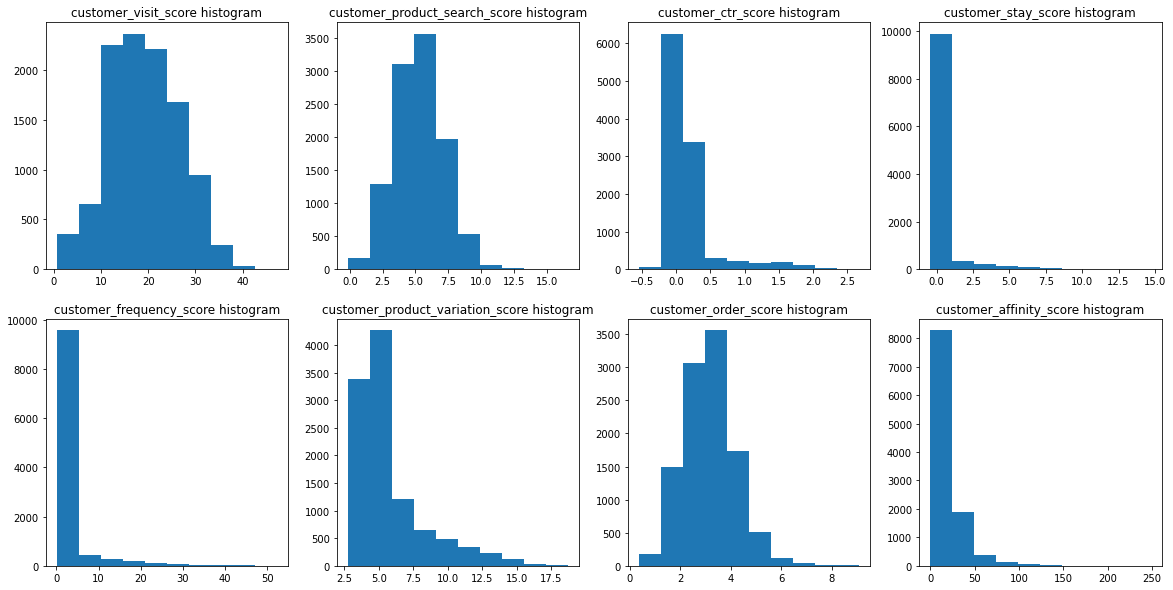

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(20,  10))

col_ind = 0

for i in range(2):
    for j in range(4):
        axs[i, j].set_title(f"{col_names[col_ind]} histogram")
        axs[i, j].hist(df[col_names[col_ind]])
        col_ind += 1

plt.show()

### Plot pies

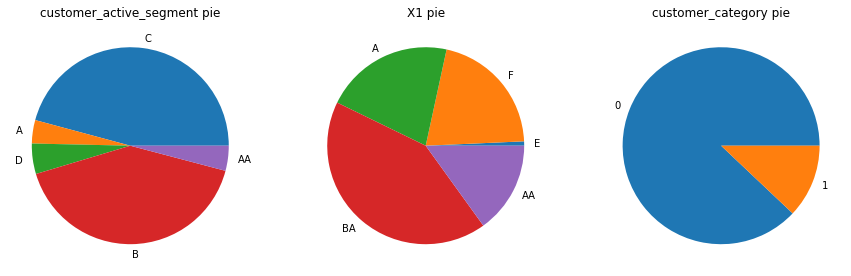

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15,  7))

for i in range(3):
    value_dict = dict(df[columns[i]].value_counts(sort=False))
    axs[i].set_title(f"{columns[i]} pie")
    axs[i].pie(value_dict.values(), labels=value_dict.keys())

plt.show()

### Normallize data where possible

In [9]:
normalized_df = df.copy()
normalized_df[col_names] = normalized_df[col_names].apply(lambda x: (x-x.min())/(x.max()-x.min()))
normalized_df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,C,F,0
1,csid_2,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,C,A,0
2,csid_3,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,C,BA,0
3,csid_4,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,AA,F,0
4,csid_5,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,C,BA,0
10734,csid_10735,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,C,BA,0
10735,csid_10736,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,A,BA,0
10736,csid_10737,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,B,AA,0


### Print out boxplot after and before data normalization

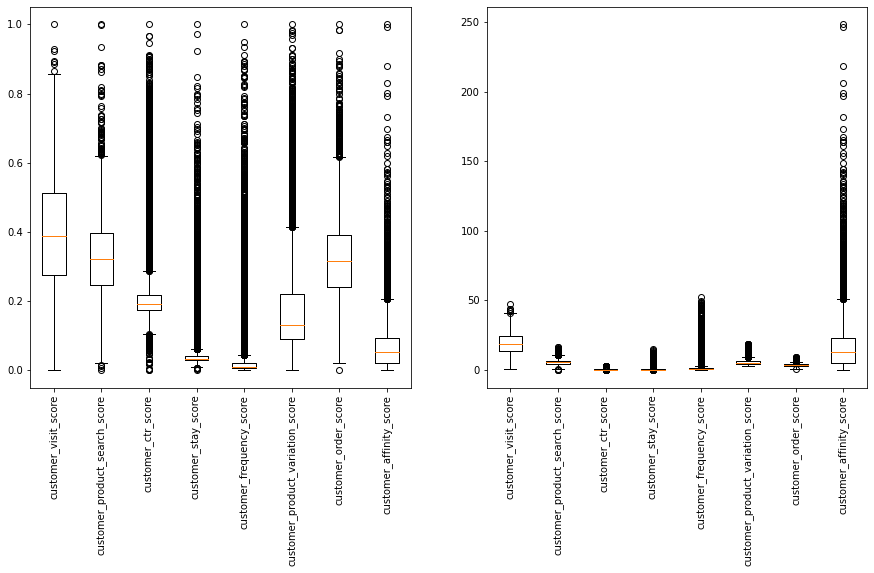

In [10]:

fig, axs = plt.subplots(1, 2, figsize=(15,  7))

axs[0].boxplot(normalized_df[col_names])
axs[0].set_xticklabels(col_names, rotation=90)

axs[1].boxplot(df[col_names])
axs[1].set_xticklabels(col_names, rotation=90)

plt.show()

### Print histograms after and before data normalization (only numbers on x axis change )

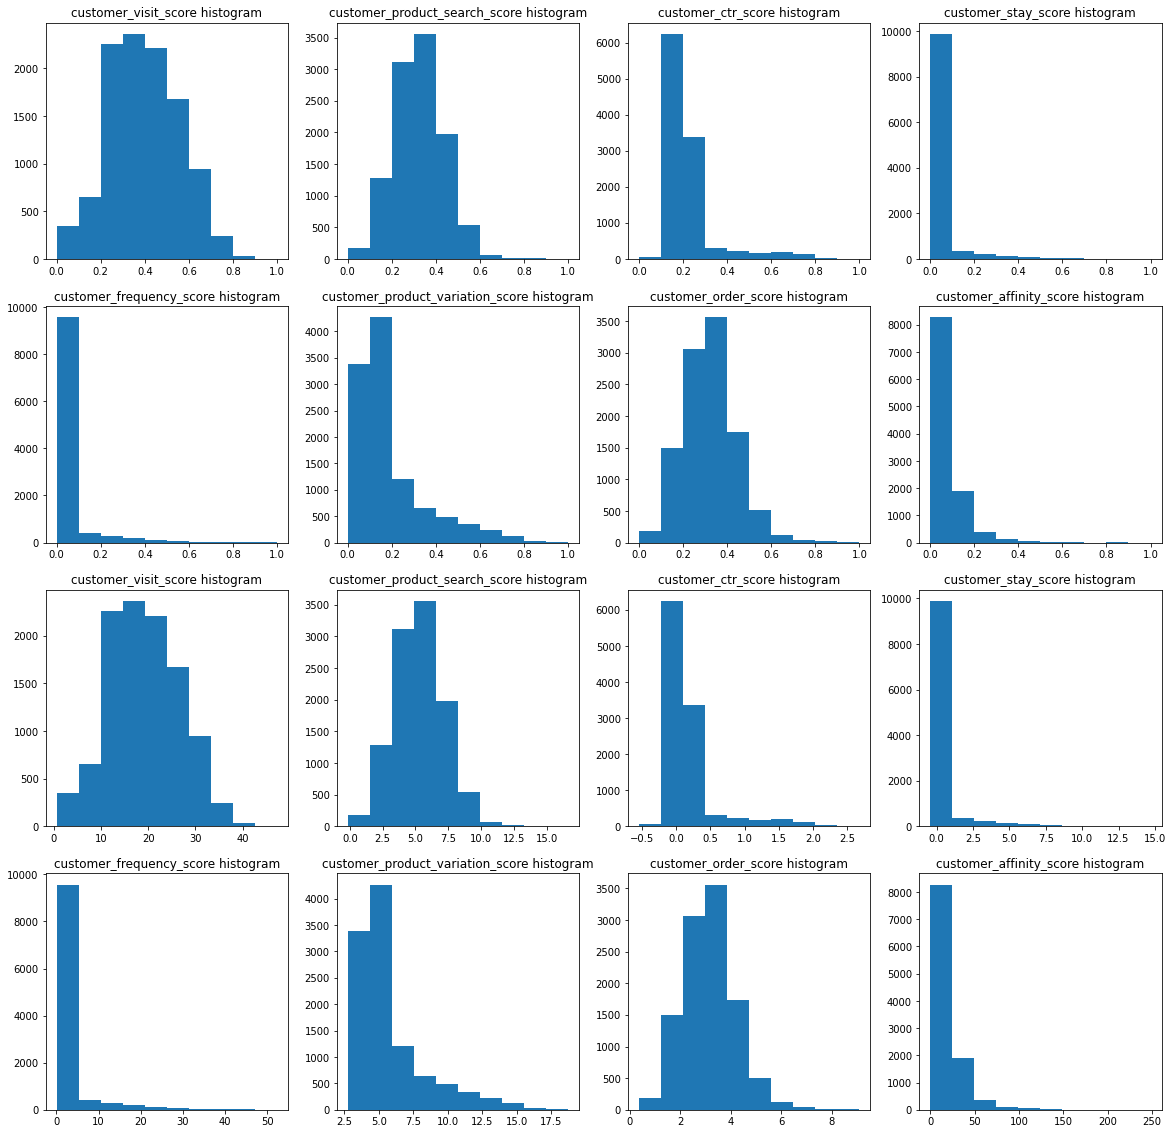

In [11]:
fig, axs = plt.subplots(4, 4, figsize=(20,  20))

col_ind = 0

for i in range(2):
    for j in range(4):
        axs[i, j].set_title(f"{col_names[col_ind]} histogram")
        axs[i, j].hist(normalized_df[col_names[col_ind]])
        col_ind += 1
        
col_ind = 0

for i in range(2, 4):
    for j in range(4):
        axs[i, j].set_title(f"{col_names[col_ind]} histogram")
        axs[i, j].hist(df[col_names[col_ind]])
        col_ind += 1

plt.show()

### Calculate statistics (mean, standard deviation, correlation matrix, frequency) where possible

In [12]:

for col in normalized_df.columns[1:-3]:
    print("mean for", col, ": ", normalized_df[col].mean())

print()

for col in normalized_df.columns[1:-3]:
    print("standard diviation for", col, ": ", normalized_df[col].std())

print()

for col in normalized_df.columns[-3::]:
    print("frequency for ", col, ":")
    print(normalized_df[col].value_counts())
    print()

print()



mean for customer_visit_score :  0.3956541754425075
mean for customer_product_search_score :  0.32377863223636344
mean for customer_ctr_score :  0.2242941255374632
mean for customer_stay_score :  0.055108356415794736
mean for customer_frequency_score :  0.044843978989993705
mean for customer_product_variation_score :  0.18994410466672418
mean for customer_order_score :  0.3199929337983113
mean for customer_affinity_score :  0.07046538234922978

standard diviation for customer_visit_score :  0.15874989386370444
standard diviation for customer_product_search_score :  0.11186703376274128
standard diviation for customer_ctr_score :  0.11551763741992373
standard diviation for customer_stay_score :  0.08045492025861516
standard diviation for customer_frequency_score :  0.10697521298277235
standard diviation for customer_product_variation_score :  0.15796855766204507
standard diviation for customer_order_score :  0.1185835618441471
standard diviation for customer_affinity_score :  0.075340203

In [13]:
# correlation matrix
corr = normalized_df.corr()
corr

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.274598,-0.569430,-0.473140,-0.209270,-0.219685,0.169488,0.118925,-0.449654
customer_product_search_score,0.274598,1.000000,-0.416085,-0.414341,-0.023170,-0.066498,0.051417,0.044315,-0.300620
customer_ctr_score,-0.569430,-0.416085,1.000000,0.907256,0.419461,0.447321,-0.341081,-0.232876,0.794445
customer_stay_score,-0.473140,-0.414341,0.907256,1.000000,0.400028,0.405521,-0.309695,-0.210387,0.677964
customer_frequency_score,-0.209270,-0.023170,0.419461,0.400028,1.000000,0.702047,-0.531797,-0.326201,0.389465
customer_product_variation_score,-0.219685,-0.066498,0.447321,0.405521,0.702047,1.000000,-0.690514,-0.525277,0.492810
customer_order_score,0.169488,0.051417,-0.341081,-0.309695,-0.531797,-0.690514,1.000000,0.760896,-0.383878
customer_affinity_score,0.118925,0.044315,-0.232876,-0.210387,-0.326201,-0.525277,0.760896,1.000000,-0.274105
customer_category,-0.449654,-0.300620,0.794445,0.677964,0.389465,0.492810,-0.383878,-0.274105,1.000000


### Plot a heat map for correlation matrix

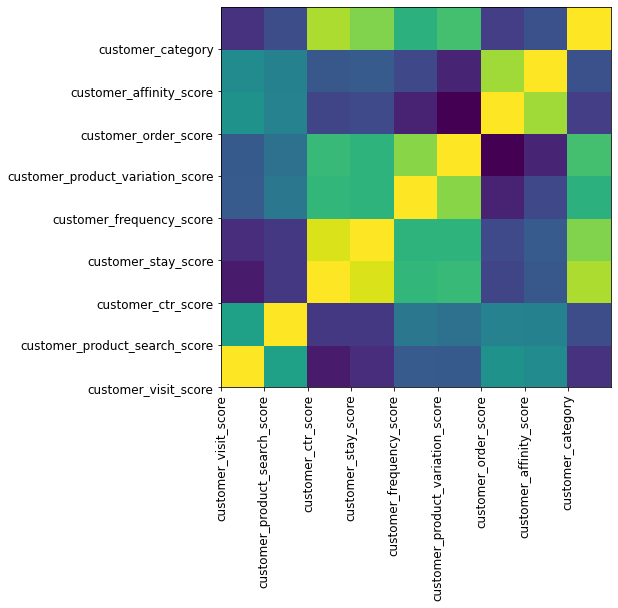

In [14]:
plt.figure(figsize=(7, 7))
plt.pcolor(corr)
plt.yticks(ticks=range(9), labels=col_names + ["customer_category"], fontsize=12)
plt.xticks(ticks=range(9), labels=col_names + ["customer_category"], rotation=90, fontsize=12)
plt.show()

## Encode categorical features so that i can use it in ML and drop first column as it doesnt tell us anything

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = normalized_df.columns[-3::]
le = LabelEncoder()
# apply le on categorical feature columns
normalized_df[categorical_cols] = normalized_df[categorical_cols].apply(lambda col: le.fit_transform(col))
main_df = normalized_df[normalized_df.columns[1::]]
main_df




,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0
10735,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,0,2,0
10736,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,2,1,0


### Removing outliers from our dataframe

In [16]:
from scipy import stats
ml_df = main_df.copy()
num_df = ml_df[ml_df.columns[:-3]]
num_df = num_df[(np.abs(stats.zscore(num_df)) < 3).all(axis=1) == True]
indexes = list(num_df.index)

ml_df = ml_df.loc[indexes]
ml_df[ml_df.columns[:-3]] = num_df

ml_df




,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10732,0.301578,0.327601,0.183398,0.022250,0.004592,0.113201,0.380645,0.058437,3,0,0
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0
10735,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,0,2,0


### Split daraframe on train and test datasets

In [62]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = ml_df[ml_df.columns[:-1]]
y = ml_df['customer_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

regressor = RandomForestClassifier()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9740932642487047
Precision: 0.9226519337016574
Recall: 0.7324561403508771


### Applying feature selection algorithms

In [65]:
from sklearn.feature_selection import SelectFromModel

feat_sel = SelectFromModel(regressor)
feat_sel.fit(X_train, y_train)

selected_feat= X_train[X_train.columns[(feat_sel.get_support())]]
reg2 = RandomForestClassifier()
reg2.fit(X_train, y_train)

y2_pred = reg2.predict(X_test)
print(feat_sel.get_support())
print("New Accuracy: ", metrics.accuracy_score(y_test, y2_pred))

[False False  True  True False False False False False False]
New Accuracy:  0.9751295336787564
